In [ ]:
# uni-file
# Build combined tissue file for VAE tests
    # Within single data modality, start with transcriptomics
    # Within single model system to Human project
        # Start with cell line to CPTAC

In [1]:
%whos

Interactive namespace is empty.


In [2]:
import pandas as pd
import glob as glob

### V8, AML and proteomics version

In [4]:
pths = sorted(glob.glob('../data/r8/*.tsv'))

In [5]:
pths

['../data/r8/AML_proteomics_cell-line+BeatAML.tsv',
 '../data/r8/AML_transcriptomics_cell-line+BeatAML.tsv',
 '../data/r8/colon-adeno_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/glioblastoma_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/lung-adeno_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/pancreatic-adeno_proteomics_cell-line+CPTAC.tsv']

In [6]:
pths[1]

'../data/r8/AML_transcriptomics_cell-line+BeatAML.tsv'

In [7]:
df_n = pd.read_csv(
        pths[1], sep = '\t', index_col = 0)

In [ ]:
df_n

In [9]:
df_n.Cancer_type.value_counts()

Cancer_type
AML    738
Name: count, dtype: int64

In [10]:
df_n.System.value_counts()

System
beataml      707
cell-line     31
Name: count, dtype: int64

In [ ]:
# add beataml as cancer type?

### Descriptive stats plots devel

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# Dimensions
systems = ['Cell line', 'CPTAC', 'HCMI']
cancers = ['Lung', 'Brain', 'Breast', 'Pancreas']
sample_counts = np.array([
    [5, 3, 1],
    [20, 15, 10],
    [50, 40, 30],
    [100, 80, 60]
])

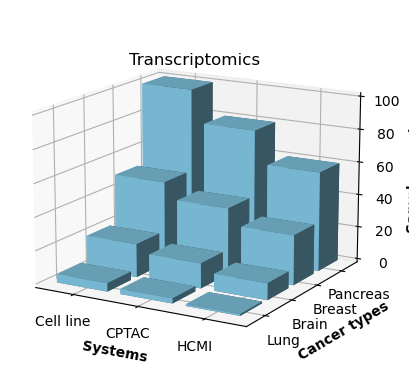

In [4]:
three_d(systems, cancers, sample_counts, title = 'Transcriptomics')

In [3]:
def three_d(categories, levels, values, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xpos, ypos = np.meshgrid(np.arange(values.shape[1]), np.arange(values.shape[0]))
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros(values.shape).flatten()
    
    dx = 0.8 * np.ones_like(zpos)
    dy = dx.copy()
    dz = values.flatten()

    # dx = 0.6 * np.ones_like(zpos)  # Adjust the value to control the width
    # dy = dx.copy()
    
    # Initial bottom values for stacking
    bottom = np.zeros_like(dz)
    
    for i in range(len(dz)):
        ax.bar3d(xpos[i], ypos[i], bottom[i], dx[i], dy[i], dz[i], color='skyblue', zsort='average')
        bottom[i] += dz[i]  # Update bottom for the next layer
    
    ax.set_xlabel('Systems', fontweight='bold')
    ax.set_ylabel('Cancer types', fontweight='bold')
    ax.set_zlabel('Sample counts', fontweight='bold')
    ax.set_xticks(np.arange(len(categories)) + 0.4)  # Center the bars
    ax.set_yticks(np.arange(len(levels)) + 0.4)
    ax.set_xticklabels(categories)
    ax.set_yticklabels(levels)
    ax.view_init(elev=15, azim=-60) # Adjust to remove overlab
    plt.title(title, y = .9)
    plt.savefig('plots/3d_test_2.png')
    plt.show()

In [ ]:
# Dimensions
categories = ['A', 'B', 'C']
levels = ['Level 1', 'Level 2', 'Level 3']
values = np.array([
    [5, 3, 1],
    [6, 2, 4],
    [3, 5, 2]
]) 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xpos, ypos = np.meshgrid(np.arange(values.shape[1]), np.arange(values.shape[0]))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(values.shape).flatten()

dx = 0.8 * np.ones_like(zpos)
dy = dx.copy()
dz = values.flatten()

# Initial bottom values for stacking
bottom = np.zeros_like(dz)

for i in range(len(dz)):
    ax.bar3d(xpos[i], ypos[i], bottom[i], dx[i], dy[i], dz[i], color='skyblue', zsort='average')
    bottom[i] += dz[i]  # Update bottom for the next layer

ax.set_xlabel('Categories')
ax.set_ylabel('Levels')
ax.set_zlabel('Values')
ax.set_xticks(np.arange(len(categories)) + 0.4)  # Center the bars
ax.set_yticks(np.arange(len(levels)) + 0.4)
ax.set_xticklabels(categories)
ax.set_yticklabels(levels)
# plt.tight_layout()
plt.savefig('plots/3d_test_1.png')
plt.show()

### Original builds, version 5:

In [ ]:
ls ../results/input-data/

In [ ]:
r = 'r5'
pths_n = sorted(glob.glob('../results/input-data/'+r+'/'+r+'-fls/*'))

In [ ]:
prot_pths = glob.glob('../results/input-data/r5/r5-fls/*_proteomics_*')
len(prot_pths)

In [ ]:
tran_pths = glob.glob('../results/input-data/r5/r5-fls/*_transcriptomics_*')
len(tran_pths)

### Cell line + CPTAC

In [ ]:
tran_pths_cl_cp = glob.glob(
    '../results/input-data/r5/r5-fls/*_transcriptomics_cell-line+CPTAC*')
len(tran_pths_cl_cp)

In [ ]:
tall_stack = pd.DataFrame()
for i, pth_n in enumerate(tran_pths_cl_cp):
    print(pth_n.split('/')[-1])
    df_n = pd.read_csv(
        pth_n, sep = '\t', index_col = 0)
    print(df_n.System.value_counts())
    # print(df_n.Cancer_type.value_counts())
    print('')
    tall_stack = pd.concat([df_n, tall_stack],
                           axis = 0,
                           # join = 'inner'
                          )
    # break

In [ ]:
tall_stack.System.value_counts()

In [ ]:
tall_stack.Cancer_type.value_counts()

In [ ]:
tall_stack.isna().sum().sum()

In [ ]:
tall_stack.to_csv(
    '../data/uni-files/trans_cl_cp_r5.tsv', sep = '\t')

### CPTAC+HCMI

In [ ]:
tran_pths_hc_cp = glob.glob(
    '../results/input-data/r5/r5-fls/*_transcriptomics_CPTAC+HCMI*')
len(tran_pths_hc_cp)

In [ ]:
tall_stack = pd.DataFrame()
for i, pth_n in enumerate(tran_pths_hc_cp):
    print(pth_n.split('/')[-1])
    df_n = pd.read_csv(
        pth_n, sep = '\t', index_col = 0)
    print(df_n.shape)
    print(df_n.System.value_counts())
    # print(df_n.Cancer_type.value_counts())
    print(' ')
    tall_stack = pd.concat([df_n, tall_stack],
                           axis = 0,
                           # join = 'inner'
                          )

In [ ]:
tall_stack.System.value_counts()

In [ ]:
tall_stack.Cancer_type.value_counts()

In [ ]:
tall_stack.isna().sum().sum()

In [ ]:
tall_stack.to_csv(
    '../data/uni-files/trans_hc_cp_r5.tsv', sep = '\t')

## Proteomics

### Cell line + CPTAC

In [11]:
prot_pths_cl_cp = glob.glob(
    '../data/r8/*_proteomics_cell-line+CPTAC*')
len(prot_pths_cl_cp)

4

In [12]:
tall_stack = pd.DataFrame()
for i, pth_n in enumerate(prot_pths_cl_cp):
    print(pth_n.split('/')[-1])
    df_n = pd.read_csv(
        pth_n, sep = '\t', index_col = 0)
    print(df_n.shape)
    # print(df_n.head(1))
    print(df_n.System.value_counts())
    # print(df_n.Cancer_type.value_counts())
    print(' ')
    tall_stack = pd.concat([df_n, tall_stack],
                           axis = 0,
                          )
    # break
tall_stack.dropna(axis=1, inplace = True)

lung-adeno_proteomics_cell-line+CPTAC.tsv
(143, 5288)
System
cptac        106
cell-line     37
Name: count, dtype: int64
 
colon-adeno_proteomics_cell-line+CPTAC.tsv
(125, 4170)
System
cptac        97
cell-line    28
Name: count, dtype: int64
 
glioblastoma_proteomics_cell-line+CPTAC.tsv
(109, 5747)
System
cptac        99
cell-line    10
Name: count, dtype: int64
 
pancreatic-adeno_proteomics_cell-line+CPTAC.tsv
(123, 4776)
System
cptac        105
cell-line     18
Name: count, dtype: int64
 


In [13]:
tall_stack.shape

(500, 3830)

In [14]:
tall_stack.System.value_counts()

System
cptac        407
cell-line     93
Name: count, dtype: int64

In [15]:
tall_stack.Cancer_type.value_counts()

Cancer_type
lung-adeno          143
colon-adeno         125
pancreatic-adeno    123
glioblastoma        109
Name: count, dtype: int64

In [16]:
tall_stack.isna().sum().sum()

0

In [17]:
tall_stack.to_csv(
    '../data/r8/nc4_proteomics_cell-line+CPTAC.tsv', sep = '\t')

In [20]:
nc3a = tall_stack[tall_stack.Cancer_type != 'lung-adeno']
len(nc3a)

357

In [25]:
nc3a.to_csv(
    '../data/r8/nc3a_proteomics_cell-line+CPTAC.tsv', sep = '\t')

In [22]:
nc3b = tall_stack[tall_stack.Cancer_type != 'colon-adeno']
len(nc3b)

375

In [26]:
nc3b.to_csv(
    '../data/r8/nc3b_proteomics_cell-line+CPTAC.tsv', sep = '\t')

In [23]:
nc3c = tall_stack[tall_stack.Cancer_type != 'pancreatic-adeno']
len(nc3c)

377

In [27]:
nc3c.to_csv(
    '../data/r8/nc3c_proteomics_cell-line+CPTAC.tsv', sep = '\t')

In [24]:
nc3d = tall_stack[tall_stack.Cancer_type != 'glioblastoma']
len(nc3d)

391

In [28]:
nc3d.to_csv(
    '../data/r8/nc3d_proteomics_cell-line+CPTAC.tsv', sep = '\t')

### CPTAC+HCMI

In [ ]:
prot_pths_hc_cp = glob.glob(
    '../results/input-data/r5/r5-fls/*_proteomics_CPTAC+HCMI*')
len(prot_pths_hc_cp)